In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


movies_df = pd.read_csv("movie_metadata.csv")
movies_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [2]:
movies_df.shape


(5043, 28)

In [3]:
null_values = movies_df.isnull().sum()
null_values

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [4]:
type(null_values)

pandas.core.series.Series

In [5]:
threshold = 0.2
columns_to_drop =null_values[null_values > threshold*len(null_values)].index
columns_to_drop

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews',
       'language', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio'],
      dtype='object')

In [6]:
cleaned_df = movies_df.drop(columns_to_drop,axis=1)
cleaned_df

,genres,movie_title,num_voted_users,cast_total_facebook_likes,movie_imdb_link,country,imdb_score,movie_facebook_likes
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,USA,7.9,33000
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,USA,7.1,0
2,Action|Adventure|Thriller,Spectre,275868,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,UK,6.8,85000
3,Action|Thriller,The Dark Knight Rises,1144337,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,USA,8.5,164000
4,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,7.1,0
...,...,...,...,...,...,...,...,...
5038,Comedy|Drama,Signed Sealed Delivered,629,2283,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,Canada,7.7,84
5039,Crime|Drama|Mystery|Thriller,The Following,73839,1753,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,USA,7.5,32000
5040,Drama|Horror|Thriller,A Plague So Pleasant,38,0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,USA,6.3,16
5041,Comedy|Drama|Romance,Shanghai Calling,1255,2386,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,USA,6.3,660


In [7]:
cleaned_df.head()

,genres,movie_title,num_voted_users,cast_total_facebook_likes,movie_imdb_link,country,imdb_score,movie_facebook_likes
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,USA,7.9,33000
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,USA,7.1,0
2,Action|Adventure|Thriller,Spectre,275868,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,UK,6.8,85000
3,Action|Thriller,The Dark Knight Rises,1144337,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,USA,8.5,164000
4,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,7.1,0


In [8]:
cleaned_df['num_voted_users'].fillna(cleaned_df['num_voted_users'].mean())

0        886204
1        471220
2        275868
3       1144337
4             8
         ...   
5038        629
5039      73839
5040         38
5041       1255
5042       4285
Name: num_voted_users, Length: 5043, dtype: int64

In [9]:
cleaned_df.fillna(cleaned_df.mean(numeric_only=True),inplace = True)
cleaned_df.fillna(cleaned_df.select_dtypes('object').mode().iloc[0],inplace=True)
cleaned_df.select_dtypes('object').mode()

,genres,movie_title,movie_imdb_link,country
0,Drama,Ben-Hur,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,USA
1,NaN,Halloween,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,NaN
2,NaN,Home,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,NaN
3,NaN,King Kong,http://www.imdb.com/title/tt1976009/?ref_=fn_t...,NaN
4,NaN,Pan,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,NaN
5,NaN,The Fast and the Furious,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,NaN
6,NaN,Victor Frankenstein,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,NaN


In [10]:
cleaned_df.isnull().sum()

genres                       0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
movie_imdb_link              0
country                      0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [11]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   genres                     5043 non-null   object 
 1   movie_title                5043 non-null   object 
 2   num_voted_users            5043 non-null   int64  
 3   cast_total_facebook_likes  5043 non-null   int64  
 4   movie_imdb_link            5043 non-null   object 
 5   country                    5043 non-null   object 
 6   imdb_score                 5043 non-null   float64
 7   movie_facebook_likes       5043 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 315.3+ KB


In [12]:
cleaned_df.describe()

,num_voted_users,cast_total_facebook_likes,imdb_score,movie_facebook_likes
count,5.043000e+03,5043.000000,5043.000000,5043.000000
mean,8.366816e+04,9699.063851,6.442138,7525.964505
std,1.384853e+05,18163.799124,1.125116,19320.445110
min,5.000000e+00,0.000000,1.600000,0.000000
25%,8.593500e+03,1411.000000,5.800000,0.000000
50%,3.435900e+04,3090.000000,6.600000,166.000000
75%,9.630900e+04,13756.500000,7.200000,3000.000000
max,1.689764e+06,656730.000000,9.500000,349000.000000


In [13]:
top_director = movies_df['director_name'].value_counts().idxmax()
movies_df['director_name'].value_counts()

director_name
Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
John Crowley         1
Rob Pritts           1
David S. Ward        1
R.J. Cutler          1
Daniel Hsia          1
Name: count, Length: 2398, dtype: int64

In [14]:
top_director

'Steven Spielberg'

In [15]:
cleaned_df.groupby('genres').agg({'imdb_score':max})

C:\Users\kapil\AppData\Local\Temp\ipykernel_7992\2963238230.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cleaned_df.groupby('genres').agg({'imdb_score':max})


,imdb_score
genres,
Action,9.1
Action|Adventure,8.5
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,6.2
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller,6.0
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,8.0
...,...
Sci-Fi|Thriller,8.2
Thriller,7.5
Thriller|War,7.9


In [16]:
cleaned_df[['movie_title','imdb_score']].sort_values(by='imdb_score',ascending=False).head(5)

,movie_title,imdb_score
2765,Towering Inferno,9.5
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
4409,Kickboxer: Vengeance,9.1
2824,Dekalog,9.1


Text(0.5, 1.0, 'Basic Histogram')

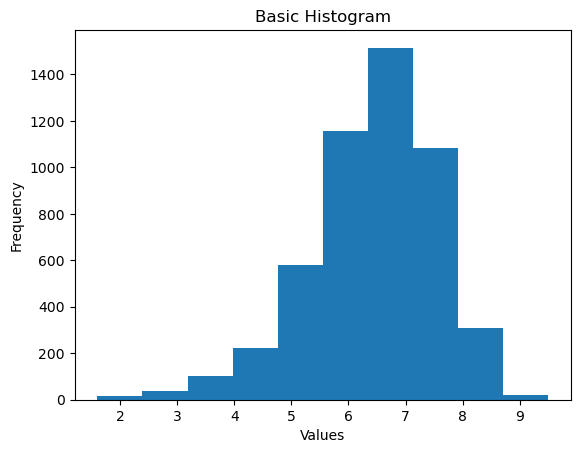

In [17]:
plt.hist(cleaned_df['imdb_score'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

<Axes: xlabel='imdb_score', ylabel='Count'>

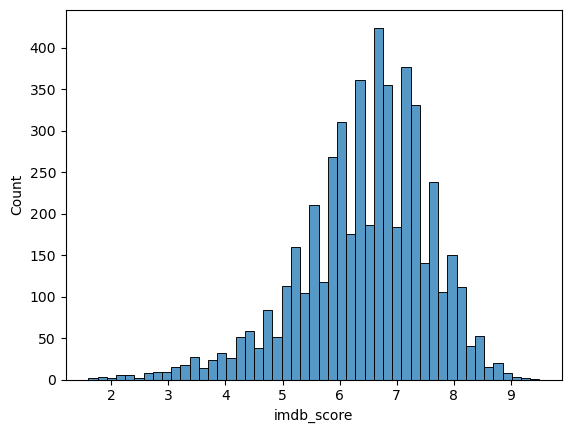

In [18]:
sns.histplot(cleaned_df['imdb_score'])

Text(0, 0.5, 'Frequency')

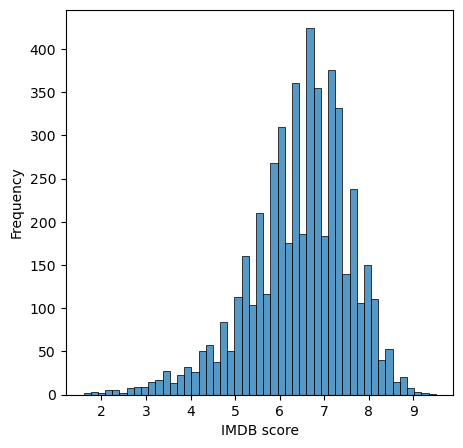

In [19]:
plt.figure(figsize=(5,5))
sns.histplot(cleaned_df['imdb_score'])
plt.xlabel('IMDB score')
plt.ylabel('Frequency')

<Axes: xlabel='genres', ylabel='count'>

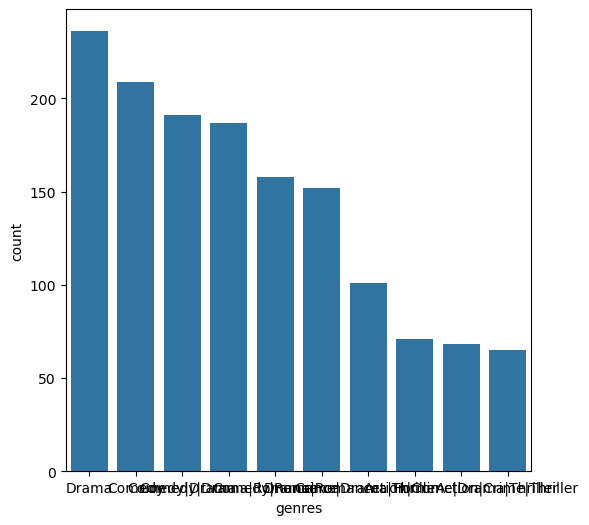

In [20]:
plt.figure(figsize=(6,6))
genre = cleaned_df['genres'].value_counts().head(10)
sns.barplot(data=genre,legend='full')

In [21]:
cleaned_df[['movie_title','movie_facebook_likes']].sort_values(by='movie_facebook_likes',ascending=False).head(10)

,movie_title,movie_facebook_likes
96,Interstellar,349000
296,Django Unchained,199000
10,Batman v Superman: Dawn of Justice,197000
128,Mad Max: Fury Road,191000
179,The Revenant,190000
97,Inception,175000
99,The Hobbit: An Unexpected Journey,166000
2614,The Imitation Game,165000
3,The Dark Knight Rises,164000
278,The Martian,153000


(array([4.712e+03, 2.300e+02, 5.700e+01, 2.700e+01, 1.100e+01, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.,  34900.,  69800., 104700., 139600., 174500., 209400.,
        244300., 279200., 314100., 349000.]),
 <BarContainer object of 10 artists>)

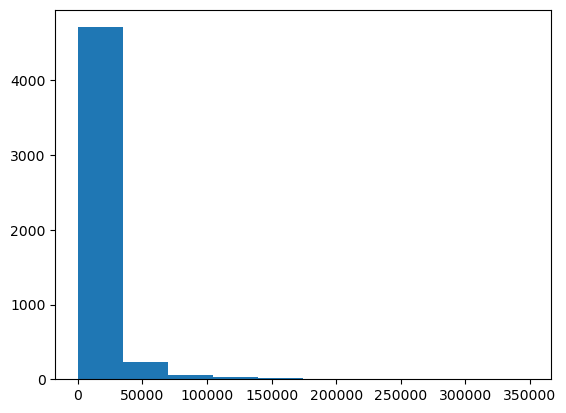

In [22]:
plt.hist(cleaned_df['movie_facebook_likes'])